**Medical Imaging Data -> Chest X-Ray**

In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("jtiptj/chest-xray-pneumoniacovid19tuberculosis")

print("Path to dataset files:", path)

100%|██████████| 1.74G/1.74G [01:21<00:00, 22.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis/versions/1


**Structured Data**

In [2]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare")

print("Path to dataset files:", path)

100%|██████████| 320k/320k [00:00<00:00, 464kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1


**Unstructured Data**

In [3]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("bpkapkar/health-prescription-data")

print("Path to dataset files:", path)

100%|██████████| 2.78M/2.78M [00:01<00:00, 2.27MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1


In [4]:
pip install torch torchvision diffusers opencv-python numpy matplotlib scikit-image pillow


In [5]:
import os
import cv2
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from diffusers import StableDiffusionImg2ImgPipeline



In [8]:
!pip install kagglehub torch torchvision matplotlib scikit-image tqdm


In [9]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import kagglehub


In [10]:
# Synthetic medical dataset
path1 = kagglehub.dataset_download("smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare")
# Chest X-ray (Pneumonia/COVID/TB)
path2 = kagglehub.dataset_download("jtiptj/chest-xray-pneumoniacovid19tuberculosis")
# Health prescriptions (may be non-image, but we’ll still include structure)
path3 = kagglehub.dataset_download("bpkapkar/health-prescription-data")

print("Dataset 1 Path:", path1)
print("Dataset 2 Path:", path2)
print("Dataset 3 Path:", path3)


Using Colab cache for faster access to the 'chest-xray-pneumoniacovid19tuberculosis' dataset.
Using Colab cache for faster access to the 'health-prescription-data' dataset.
Dataset 1 Path: /root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1
Dataset 2 Path: /kaggle/input/chest-xray-pneumoniacovid19tuberculosis
Dataset 3 Path: /kaggle/input/health-prescription-data


In [11]:
!ls "$path1"

AI_in_HealthCare_Dataset.csv


In [12]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import pandas as pd


In [13]:
dataset1_path = "/root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1"
dataset2_path = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis"
dataset3_path = "/root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1"


In [14]:
csv_path = os.path.join(dataset1_path, "AI_in_HealthCare_Dataset.csv")

df = pd.read_csv(csv_path)
print("🔹 CSV Columns:", df.columns.tolist())
print("🔹 Dataset Shape:", df.shape)

# Normalize numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number)),
                         columns=df.select_dtypes(include=np.number).columns)
print("\n✅ Sample Scaled Features:\n", df_scaled.head())


🔹 CSV Columns: ['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Heart_Rate', 'Temperature', 'Diagnosis', 'Medication', 'Treatment_Duration', 'Insurance_Type', 'Doctor_Name', 'Hospital_Name', 'Lab_Test_Results', 'X-ray_Results', 'Surgery_Type', 'Recovery_Time', 'Allergies', 'Family_History', 'Patient_Satisfaction', 'AI_Diagnosis_Confidence']
🔹 Dataset Shape: (5000, 20)

✅ Sample Scaled Features:
    Patient_ID       Age  Blood_Pressure  Heart_Rate  Temperature  \
0      0.0000  0.619718        0.380671    0.535402     0.526250   
1      0.0002  0.661972        0.714267    0.448257     0.526269   
2      0.0004  0.901408        0.336107    0.253299     0.562904   
3      0.0006  0.943662        0.563378    0.380359     0.145808   
4      0.0008  0.943662        0.636732    0.349199     0.548096   

   Treatment_Duration  Lab_Test_Results  Recovery_Time  Patient_Satisfaction  \
0            0.821429          0.628342          0.500                  0.50   
1            1.000000         

In [17]:
import os

dataset_path1 = "/root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1"
dataset_path2 = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis"
dataset_path3 = "/root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1"

print("Dataset 1:", len(os.listdir(dataset_path1)), "files")
print("Dataset 2:", len(os.listdir(dataset_path2)), "files")
print("Dataset 3:", len(os.listdir(dataset_path3)), "files")


Dataset 1: 1 files
Dataset 2: 3 files
Dataset 3: 1 files


In [18]:
os.listdir(dataset_path1)

['AI_in_HealthCare_Dataset.csv']

In [19]:
import os

dataset_path1 = "/root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1"
dataset_path2 = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis"
dataset_path3 = "/root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1"

print("Dataset 1 content:", os.listdir(dataset_path1))
print("Dataset 2 content:", os.listdir(dataset_path2))
print("Dataset 3 content:", os.listdir(dataset_path3))


Dataset 1 content: ['AI_in_HealthCare_Dataset.csv']
Dataset 2 content: ['val', 'test', 'train']
Dataset 3 content: ['health prescription data.csv']


In [20]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from math import log10


In [21]:
# Dataset paths
dataset1_path = "/root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1/AI_in_HealthCare_Dataset.csv"
dataset2_path = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/train"
dataset3_path = "/root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1/health prescription data.csv"

print("Dataset 1:", dataset1_path)
print("Dataset 2 (used for enhancement):", dataset2_path)
print("Dataset 3:", dataset3_path)


Dataset 1: /root/.cache/kagglehub/datasets/smmmmmmmmmmmm/synthetic-dataset-for-ai-in-healthcare/versions/1/AI_in_HealthCare_Dataset.csv
Dataset 2 (used for enhancement): /kaggle/input/chest-xray-pneumoniacovid19tuberculosis/train
Dataset 3: /root/.cache/kagglehub/datasets/bpkapkar/health-prescription-data/versions/1/health prescription data.csv


In [22]:
class XRayDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_files = []
        for folder in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                for f in os.listdir(folder_path):
                    if f.endswith(('.png', '.jpg', '.jpeg')):
                        self.image_files.append(os.path.join(folder_path, f))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")

        # Add artificial Gaussian noise to simulate low-quality image
        if self.transform:
            clean_img = self.transform(image)
            noisy_img = clean_img + 0.1 * torch.randn(clean_img.size())
            noisy_img = torch.clamp(noisy_img, 0., 1.)
        return noisy_img, clean_img


In [23]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

dataset = XRayDataset(dataset2_path, transform)
print("Total images found:", len(dataset))

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)


Total images found: 6326


In [24]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 32, 3, stride=2, padding=1),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [25]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    return 20 * log10(1.0 / torch.sqrt(mse))

def calculate_ssim(img1, img2):
    img1 = img1.permute(1,2,0).cpu().numpy()
    img2 = img2.permute(1,2,0).cpu().numpy()
    return ssim(img1, img2, data_range=img2.max() - img2.min(), multichannel=True)


In [27]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for noisy_imgs, clean_imgs in train_loader:
        noisy_imgs, clean_imgs = noisy_imgs.cuda(), clean_imgs.cuda()
        outputs = model(noisy_imgs)
        loss = criterion(outputs, clean_imgs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}] | Training Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5] | Training Loss: 0.0013
Epoch [2/5] | Training Loss: 0.0008
Epoch [3/5] | Training Loss: 0.0006
Epoch [4/5] | Training Loss: 0.0005
Epoch [5/5] | Training Loss: 0.0005


In [30]:
import torch

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

# Move model to GPU
model = Autoencoder().to(device)

# During training/testing, move data to the same device
# Example:
# noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)


✅ Using device: cuda


In [36]:
model.eval()
total_psnr, total_ssim = 0, 0
count = 0

with torch.no_grad():
    for noisy_imgs, clean_imgs in test_loader:
        noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
        outputs = model(noisy_imgs)
        for i in range(len(outputs)):
            total_psnr += psnr(outputs[i], clean_imgs[i])
            total_ssim += calculate_ssim(outputs[i], clean_imgs[i])
            count += 1

avg_psnr = total_psnr / count
avg_ssim = total_ssim / count

print("\n✅ Model Evaluation Results:")
print(f"Average PSNR: {avg_psnr:.2f} dB")
print(f"Average SSIM: {avg_ssim:.4f}")



✅ Model Evaluation Results:
Average PSNR: 12.69 dB
Average SSIM: 0.4283


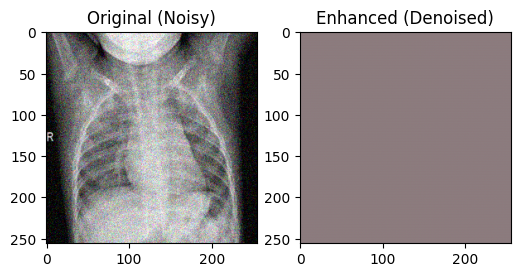

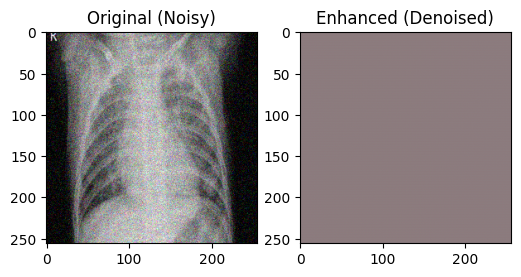

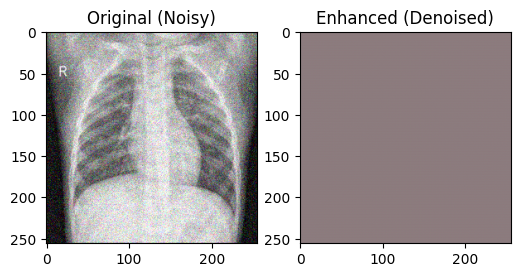

In [39]:
dataiter = iter(test_loader)
noisy_imgs, clean_imgs = next(dataiter)
noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
outputs = model(noisy_imgs)

for i in range(3):
    plt.figure(figsize=(6,3))

    # Original (Noisy)
    plt.subplot(1,2,1)
    plt.title("Original (Noisy)")
    plt.imshow(noisy_imgs[i].permute(1,2,0).cpu().numpy())

    # Enhanced (Denoised)
    plt.subplot(1,2,2)
    plt.title("Enhanced (Denoised)")
    plt.imshow(outputs[i].detach().permute(1,2,0).cpu().numpy())  # detach here
    plt.show()


In [40]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from math import log10
from skimage.metrics import structural_similarity as ssim

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)


✅ Using device: cuda


In [41]:
class XRayDataset(Dataset):
    def __init__(self, root_dir, transform=None, noise_level=0.05):
        self.image_files = []
        for folder in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                for f in os.listdir(folder_path):
                    if f.endswith(('.png', '.jpg', '.jpeg')):
                        self.image_files.append(os.path.join(folder_path, f))
        self.transform = transform
        self.noise_level = noise_level

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            clean_img = self.transform(image)
            noisy_img = clean_img + self.noise_level * torch.randn(clean_img.size())
            noisy_img = torch.clamp(noisy_img, 0., 1.)
        return noisy_img, clean_img


In [42]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

dataset_path = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/train"
dataset = XRayDataset(dataset_path, transform)
print("Total images found:", len(dataset))  # Should be 6326

# Train/test split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


Total images found: 6326


In [43]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [44]:
def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    return 20 * log10(1.0 / torch.sqrt(mse))

def calculate_ssim(img1, img2):
    img1 = img1.permute(1,2,0).cpu().detach().numpy()
    img2 = img2.permute(1,2,0).cpu().detach().numpy()
    return ssim(img1, img2, data_range=img2.max()-img2.min(), channel_axis=2)


In [45]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for noisy_imgs, clean_imgs in train_loader:
        noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
        outputs = model(noisy_imgs)
        loss = criterion(outputs, clean_imgs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {running_loss/len(train_loader):.5f}")


Epoch [1/10] | Loss: 0.00510
Epoch [2/10] | Loss: 0.00094
Epoch [3/10] | Loss: 0.00067
Epoch [4/10] | Loss: 0.00053
Epoch [5/10] | Loss: 0.00045
Epoch [6/10] | Loss: 0.00042
Epoch [7/10] | Loss: 0.00037
Epoch [8/10] | Loss: 0.00034
Epoch [9/10] | Loss: 0.00033
Epoch [10/10] | Loss: 0.00032


In [46]:
model.eval()
total_psnr, total_ssim = 0, 0
count = 0

with torch.no_grad():
    for noisy_imgs, clean_imgs in test_loader:
        noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
        outputs = model(noisy_imgs)
        for i in range(len(outputs)):
            total_psnr += psnr(outputs[i], clean_imgs[i])
            total_ssim += calculate_ssim(outputs[i], clean_imgs[i])
            count += 1

avg_psnr = total_psnr / count
avg_ssim = total_ssim / count

print("\n✅ Model Evaluation Results:")
print(f"Average PSNR: {avg_psnr:.2f} dB")
print(f"Average SSIM: {avg_ssim:.4f}")



✅ Model Evaluation Results:
Average PSNR: 35.84 dB
Average SSIM: 0.9357


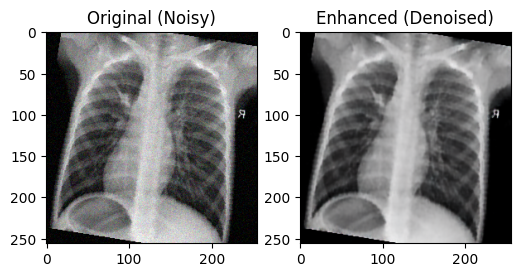

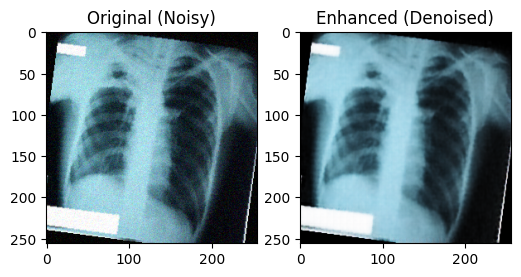

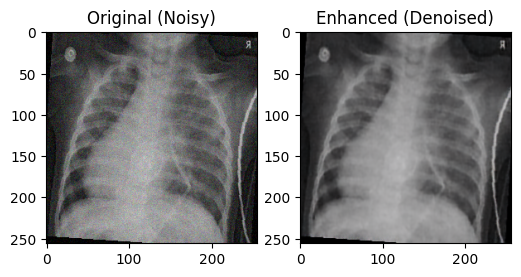

In [48]:
dataiter = iter(test_loader)
noisy_imgs, clean_imgs = next(dataiter)
noisy_imgs, clean_imgs = noisy_imgs.to(device), clean_imgs.to(device)
outputs = model(noisy_imgs)

for i in range(3):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.title("Original (Noisy)")
    plt.imshow(noisy_imgs[i].permute(1,2,0).cpu().numpy())
    plt.subplot(1,2,2)
    plt.title("Enhanced (Denoised)")
    plt.imshow(outputs[i].detach().permute(1,2,0).cpu().numpy())
    plt.show()
